# 覆盖率性能的仿真

## 覆盖率与信道衰减系数的关系

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from udntools.channel import BaseChannel
from udntools.region import ServiceRegion
from udntools.utils import cdf_y_axis
from udntools.utils import pc_gaussian_ue

In [2]:
# 基本参数设定

# 区域的基本属性
service_region = ServiceRegion(0, 100,    
                               0, 100,    
                               100, 10000, 
                               ue_distribution="gaussian",
                               ue_sigma=5.0)

# 设定仿真的信干比区间
x_axis = np.arange(-10, 20.5, 0.5)

# 定义颜色
color = ['r', 'g', 'b']

In [3]:
#######################################################################
########                                                        #######
########          channel.path_loss_factor = 4.0的情况           #######
########                                                        #######
#######################################################################

channel = BaseChannel(4.0)

# 对覆盖率仿真
sir_user_sim_4 =10 * np.log10(
                 channel.sir_vector(service_region.bs_position_,
                                    service_region.ue_position_))
cdf_nbs_4 = cdf_y_axis(x_axis, sir_user_sim_4)

# 覆盖率的理论数值
pc_nbs_4 = pc_gaussian_ue(x_axis, 0.01, 4.0, 5.0)

#######################################################################
########                                                        #######
########          channel.path_loss_factor = 2.0的情况           #######
########                                                        #######
#######################################################################

channel.set_path_loss_factor(2.0)

# 对覆盖率仿真
sir_user_sim_2 =10 * np.log10(
                 channel.sir_vector(service_region.bs_position_,
                                    service_region.ue_position_))
cdf_nbs_2 = cdf_y_axis(x_axis, sir_user_sim_2)

# 覆盖率的理论数值
pc_nbs_2 = pc_gaussian_ue(x_axis, 0.01, 2.0, 5.0)

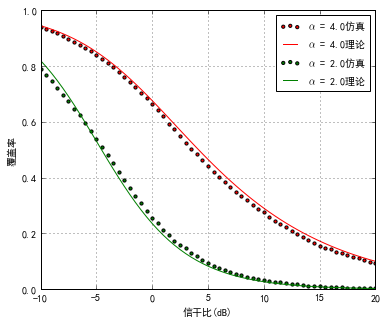

In [4]:
# 画图

# 使能中文字体
# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 图片大小
fig = plt.figure(figsize=(6, 5))

f4_theory, = plt.plot(x_axis, pc_nbs_4, color[0])
f4_sim = plt.scatter(x_axis, 1 - cdf_nbs_4, c=color[0], s = 10)

f2_theory, = plt.plot(x_axis, pc_nbs_2, color[1])
f2_sim = plt.scatter(x_axis, 1 - cdf_nbs_2, c=color[1], s = 10)

plt.xlim(-10, 20)
plt.ylim(0,1)
plt.grid(True)


# 加图例

# 使能中文字体
# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.legend(handles=[f4_sim,
                    f4_theory,
                    f2_sim,
                    f2_theory], 
           labels=[r"$\alpha$ = 4.0仿真",
                   r"$\alpha$ = 4.0理论",
                   r"$\alpha$ = 2.0仿真",
                   r"$\alpha$ = 2.0理论"], 
           loc='best',
           prop={'size': 10})
# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', size=13)
plt.ylabel("覆盖率",fontproperties = 'SimHei', size=13)
# 存储成为pdf
fig.savefig('pc_alpha.pdf')

plt.show()